## Data Analysis and Visualisation

**Name - Harsh Bamotra** <br>
**Roll No. - AC-1216**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1. Consider two excel files(construct yourselfhaving minimum 20 records)having attendance of a workshop’s participants for two days. Each file has threefields ‘Name’, ‘Time of joining’(hh:mm:ss), duration (in minutes) wherenames are unique within a file. Note that durationmay take one of three values (30, 40, 50) only. Import the data into two dataframes and do the following:<br>**

In [6]:
day1 = pd.read_csv("Day1.csv")
day2 = pd.read_csv("Day2.csv")

**a) Perform merging of the two dataframes to find the names of students who had attended theworkshop on both days.**

In [10]:
print("Students who had attended workshop on both days ::")
day1.merge(day2, how = "inner", on="Name")["Name"]

Students who had attended workshop on both days ::


0        Harsh
1       Nilesh
2      Ipshita
3        Rahul
4        Jatin
5       Nitesh
6      Ram Lal
7     Shashank
8        Pablo
9        Reena
10    Himanhsu
11      Ishita
12        Rose
13     Jassica
14     Laskhya
15      Sameer
Name: Name, dtype: object

**b) Find names of all students who have attended workshop on either of the days.**

In [11]:
day1.merge(day2, how = "outer", on="Name")["Name"]

0             Harsh
1            Nilesh
2           Ipshita
3             Rahul
4             Jatin
5            Nitesh
6             Seema
7           Ram Lal
8          Shashank
9       Honey Singh
10            Pablo
11            Reena
12         Himanhsu
13             Nina
14           Ishita
15             Rose
16          Jassica
17          Laskhya
18           Sameer
19             Ayan
20            Suman
21    Gippy Garewal
22             Tiku
23          Iftekar
Name: Name, dtype: object

**c) Merge two data frames row-wise and find the total number of records in the data frame.**

In [18]:
total = pd.concat([day1, day2]).reset_index(drop = True)
print("There are {} records in the dataframe ::".format(len(total)))
total.head()

There are 40 records in the dataframe ::


,Name,Time of joining,Duration
0,Harsh,10:00:00,30.0
1,Nilesh,10:00:00,40.0
2,Ipshita,10:00:00,50.0
3,Rahul,10:00:00,30.0
4,Jatin,10:00:00,30.0


**d) Merge two data frames and use two columns names and duration as multi-row indexes. Generate descriptive statistics for this multi-index.**

In [24]:
result = day1.merge(day2)
result.set_index(["Name", "Duration"]).describe()

,Time of joining
count,6
unique,1
top,10:00:00
freq,6


**e) Count  number of rows with more than one NA values.**

In [29]:
count = 0
for i in pd.concat([day1, day2]).isna().sum():
    if i > 1:
        count+=1
print("Rows with more than one NA value ::", count)

Rows with more than one NA value :: 2


**Q2. Taking Iris data, plot the following with proper legend and axis labels:**

In [55]:
data = pd.read_csv("iris_data.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**a) Plot bar chart to show the frequency of each class label in the data.**

In [45]:
xy = data["class"].value_counts()

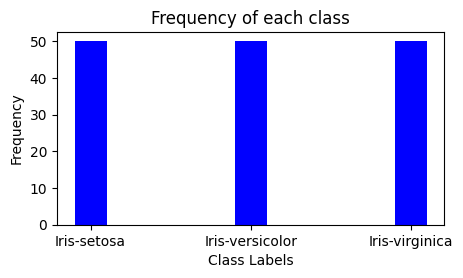

In [56]:
fig = plt.figure(figsize = (5, 2.5))
plt.bar(xy.keys(), list(xy), color ='Blue', width = 0.2)
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Frequency of each class")
plt.show()

**b) Draw a scatter plot for Petal width vs sepal width.**

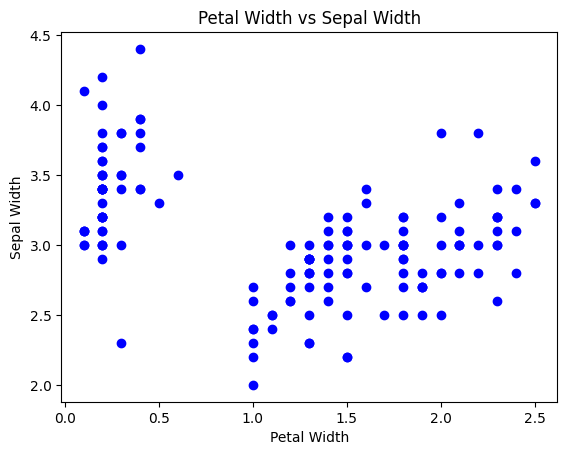

In [57]:
x = data["petal_width"]
y = data["sepal_width"]
plt.scatter(x, y, c ="blue")
plt.title("Petal Width vs Sepal Width")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Width")
plt.show()

**c) Plot density distribution for feature petal length.**

<AxesSubplot: ylabel='Density'>

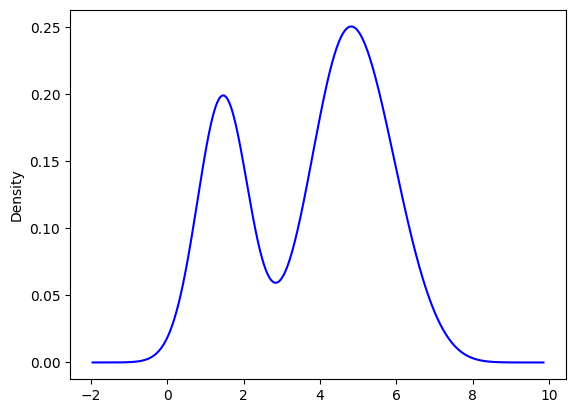

In [60]:
data.petal_length.plot.density(color = "Blue")

**d) Use a pair plot to show pairwise bivariate distribution in the Iris Dataset.**

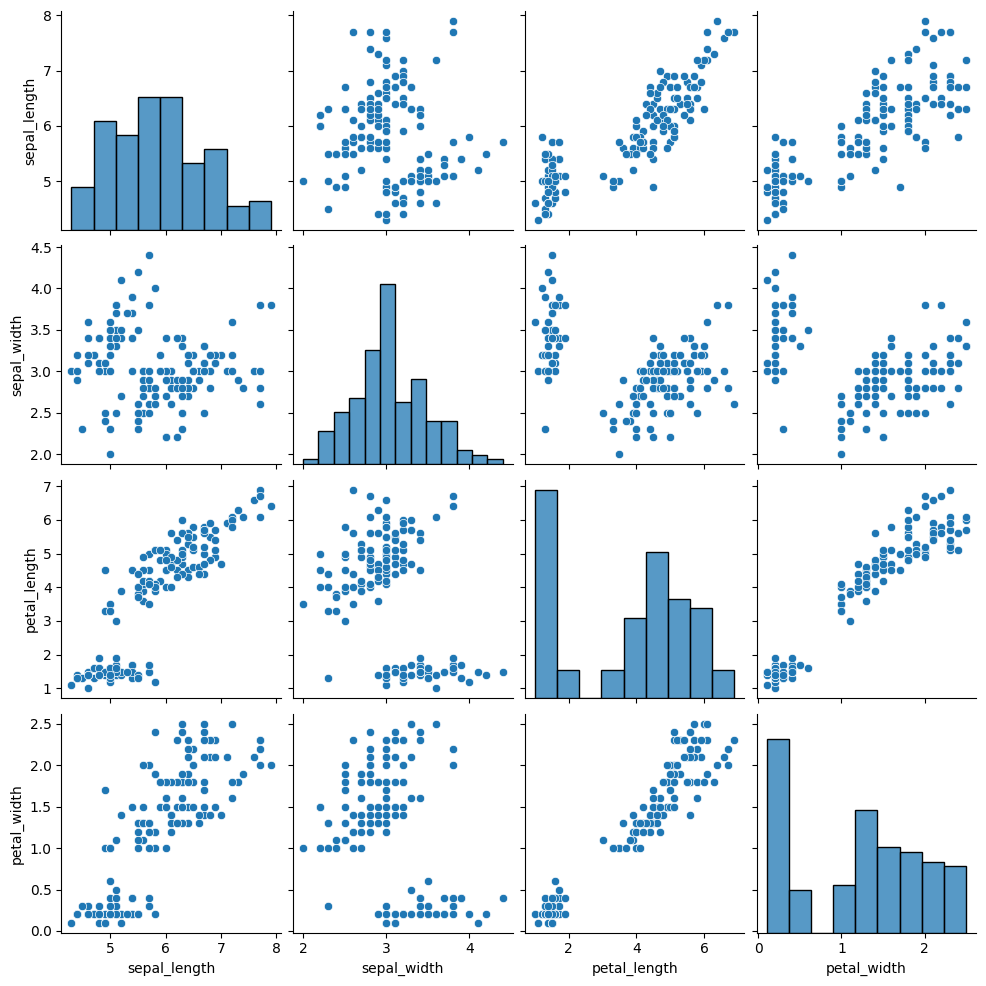

In [62]:
sns.pairplot(data)

**e) Compare  five summary distribution information of two features  petal width and sepal width using boxplots**

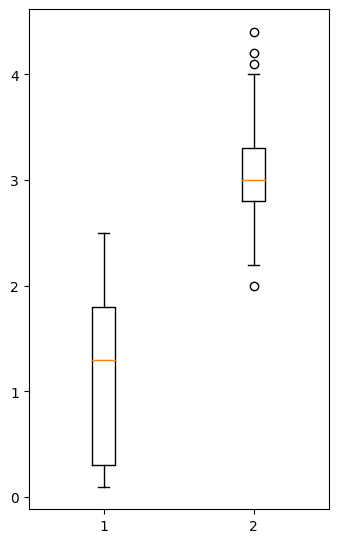

In [82]:
plot = [data["petal_width"], data["sepal_width"]]
fig = plt.figure(figsize =(3, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(plot)
plt.show()

**f) Compare five point statistical summary of two features petal width and sepal width using appropriate graph.**

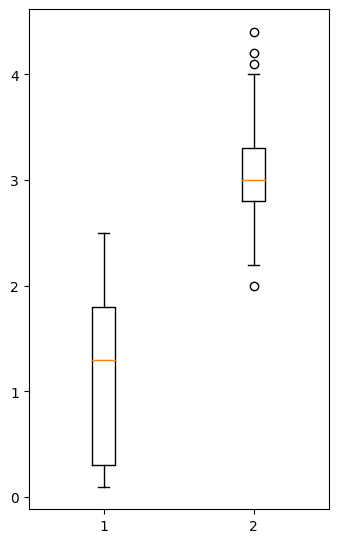

In [83]:
plot = [data["petal_width"], data["sepal_width"]]
fig = plt.figure(figsize =(3, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(plot)
plt.show()

**g) Draw a piechart showing distribution of three classes.**

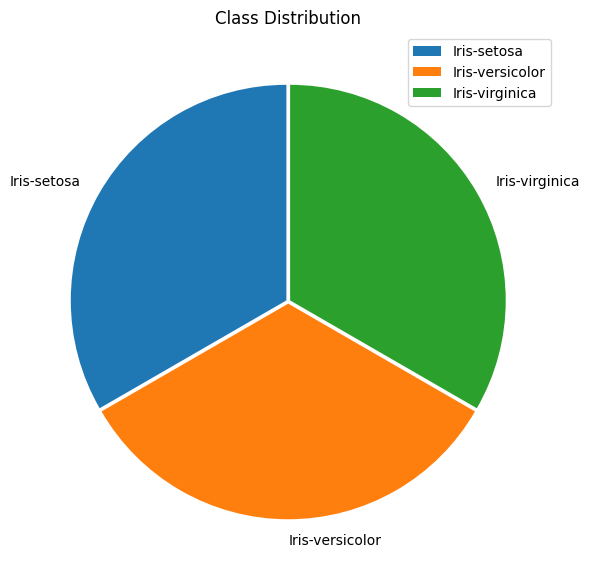

In [94]:
xy = data["class"].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.title("Class Distribution")
plt.pie(list(xy), labels = xy.keys(), explode = [0.01, 0.01, 0.01], startangle = 90)
plt.legend()
plt.show()

**Q3. Create a dataframe to store marks of M students for n subjects and do the following:** 

In [132]:
marks = pd.DataFrame(np.random.randint(101, size=(5,5)), 
                     index=["Harsh", "Shashank", "Animesh", "Robin", "Jatin"], 
                     columns = ["C++", "Java", "Python", "DAV", "DSA"])
marks

,C++,Java,Python,DAV,DSA
Harsh,8,82,97,14,48
Shashank,98,92,91,88,18
Animesh,58,10,47,36,26
Robin,10,45,47,40,17
Jatin,51,1,89,55,98


**i) Find average marks for each student and add as a column .**

In [133]:
marks["Average"] = marks.mean(axis = 1) 
marks

,C++,Java,Python,DAV,DSA,Average
Harsh,8,82,97,14,48,49.8
Shashank,98,92,91,88,18,77.4
Animesh,58,10,47,36,26,35.4
Robin,10,45,47,40,17,31.8
Jatin,51,1,89,55,98,58.8


**ii) Display average marks of each subjects and add a new row.**

In [134]:
marks.loc["Average"] = marks.mean(axis = 0)
marks

,C++,Java,Python,DAV,DSA,Average
Harsh,8.0,82.0,97.0,14.0,48.0,49.80
Shashank,98.0,92.0,91.0,88.0,18.0,77.40
Animesh,58.0,10.0,47.0,36.0,26.0,35.40
Robin,10.0,45.0,47.0,40.0,17.0,31.80
Jatin,51.0,1.0,89.0,55.0,98.0,58.80
Average,45.0,46.0,74.2,46.6,41.4,50.64


**iii) Compute descriptive statistics subject-wise.**

In [135]:
marks.describe()

,C++,Java,Python,DAV,DSA,Average
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,45.000000,46.000000,74.200000,46.600000,41.400000,50.640000
std,33.490297,36.698774,22.364257,24.507958,30.421045,16.556521
min,8.000000,1.000000,47.000000,14.000000,17.000000,31.800000
25%,18.750000,18.750000,53.800000,37.000000,20.000000,39.000000
50%,48.000000,45.500000,81.600000,43.300000,33.700000,50.220000
75%,56.250000,73.000000,90.500000,52.900000,46.350000,56.760000
max,98.000000,92.000000,97.000000,88.000000,98.000000,77.400000


**iv) Assign grades obtained by each student.**

In [136]:
grades = lambda x: "A" if x >=90 else ("B" if x<=89 and x>=80 else ("C" if x<=79 and x>=70 else ("D" if x<=69 and x>=60 else ("E" if x<=59 and x>=50 else "F"))))
new = marks["Average"].apply(grades)
new

Harsh       F
Shashank    C
Animesh     F
Robin       F
Jatin       E
Average     E
Name: Average, dtype: object

**v) Find frequency of each grade for the class.**

In [137]:
new = pd.DataFrame(new)
new.insert(0, "Name", new.index)
new.index = np.arange(1,7)
new.groupby("Average").count()

,Name
Average,
C,1
E,2
F,3


**vi) Find frequency of each grade obtained by each student and create a new DF as the following and set Rollno as the row index of the DF.**

In [149]:
newDf = marks.copy()
newDf.insert(0, "Name", newDf.index)
newDf.index = np.arange(1, 7)
newDf = newDf.drop("Average", axis = 1)
newDf = newDf.drop(6, axis = 0)
newDf

,Name,C++,Java,Python,DAV,DSA
1,Harsh,8.0,82.0,97.0,14.0,48.0
2,Shashank,98.0,92.0,91.0,88.0,18.0
3,Animesh,58.0,10.0,47.0,36.0,26.0
4,Robin,10.0,45.0,47.0,40.0,17.0
5,Jatin,51.0,1.0,89.0,55.0,98.0


In [150]:
for i in newDf.columns[1:]:
    newDf[i] = newDf[i].apply(grades)

In [151]:
newDf["Max Grade"] = "Z"
newDf["Freq"] = "Z"
for i in newDf.index:
    newDf.loc[i, "Max Grade"] = min(newDf.loc[i][1:-2])
    newDf.loc[i, "Freq"] = list(newDf.loc[i][1:-2].value_counts())
newDf

,Name,C++,Java,Python,DAV,DSA,Max Grade,Freq
1,Harsh,F,B,A,F,F,A,"[3, 1, 1]"
2,Shashank,A,A,A,B,F,A,"[3, 1, 1]"
3,Animesh,E,F,F,F,F,E,"[4, 1]"
4,Robin,F,F,F,F,F,F,[5]
5,Jatin,E,F,B,E,A,A,"[2, 1, 1, 1]"
